In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

spotify = pd.read_csv(
    "/Users/clarissaache/Documents/IDS 705 ML/ml-project/00_raw_data/spotify_songs.csv"
)
spotify.head()

music_covariates = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

other_covariates = ['track_album_name', 'track_name', 'track_artist']

music = spotify[music_covariates] #subset for music covariates only
music_X = spotify[music_covariates]
music_Y = spotify['playlist_genre']

kmeans = pd.read_csv(
    "/Users/clarissaache/Documents/IDS 705 ML/ml-project/10_clustering/kmeans_cluster.csv"
)

gaussian = pd.read_csv(
    "/Users/clarissaache/Documents/IDS 705 ML/ml-project/10_clustering/gaussian_cluster.csv"
)

In [14]:
kmeans

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,label
0,0,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,4
1,1,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,4
2,2,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,4
3,3,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,3
4,4,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,32828,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,3
32829,32829,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,3
32830,32830,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,3
32831,32831,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,3


In [13]:
kmeans_Y = kmeans['label']
gaussian_Y = gaussian['label']

In [15]:
from sklearn.preprocessing import StandardScaler
X_norm_K = StandardScaler().fit_transform(kmeans[music_covariates])
X_norm_G = StandardScaler().fit_transform(gaussian[music_covariates])

In [16]:
from sklearn.manifold import TSNE

tsne_km = TSNE(n_components=2, init="pca", random_state=0, perplexity=30)
X_tsne_km = tsne_km.fit_transform(X_norm_K)

/Users/clarissaache/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/clarissaache/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [17]:
tsne_gm = TSNE(n_components=2, init="pca", random_state=0, perplexity=30)
X_tsne_gm = tsne_km.fit_transform(X_norm_G)

/Users/clarissaache/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/clarissaache/opt/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [39]:
%config InlineBackend.figure_format = 'retina'

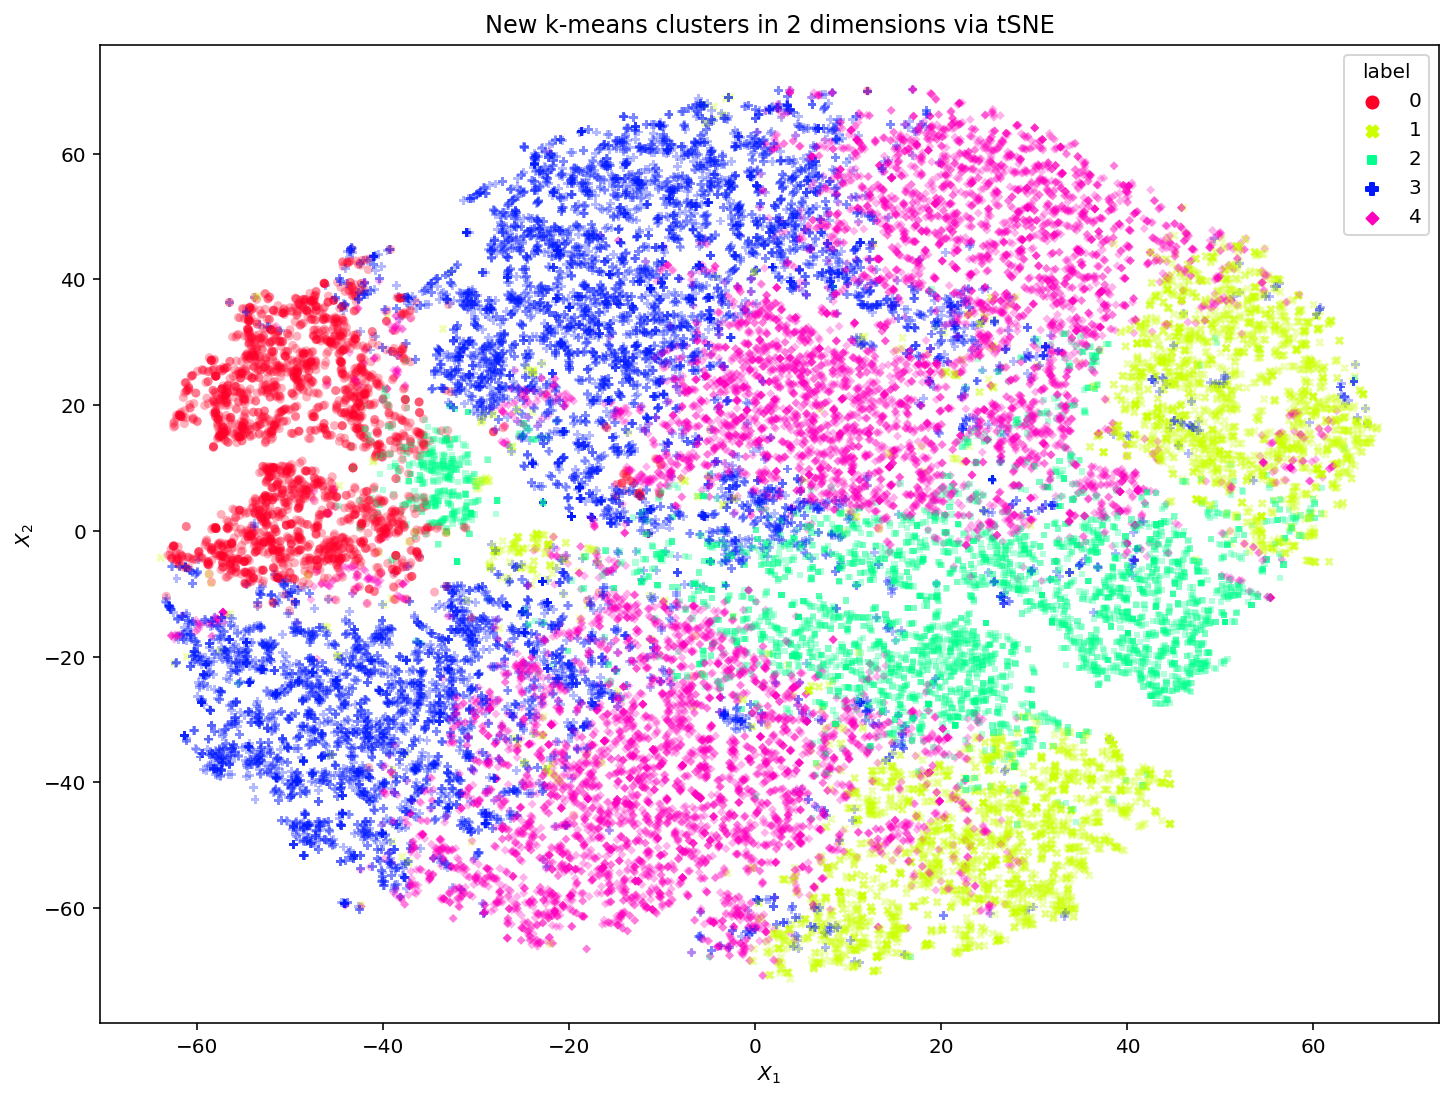

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.scatterplot(
    x=X_tsne_km[:,0],
    y=X_tsne_km[:,1],
    style=kmeans_Y,
    legend=list(kmeans_Y.unique()),
    hue=kmeans_Y,
    edgecolor="white",
    palette="gist_rainbow",
    linewidth=0.01,
    s=20,
    alpha=0.3,
).set_title("New k-means clusters in 2 dimensions via tSNE")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [29]:
list(kmeans_Y.unique())

[4, 3, 1, 0, 2]

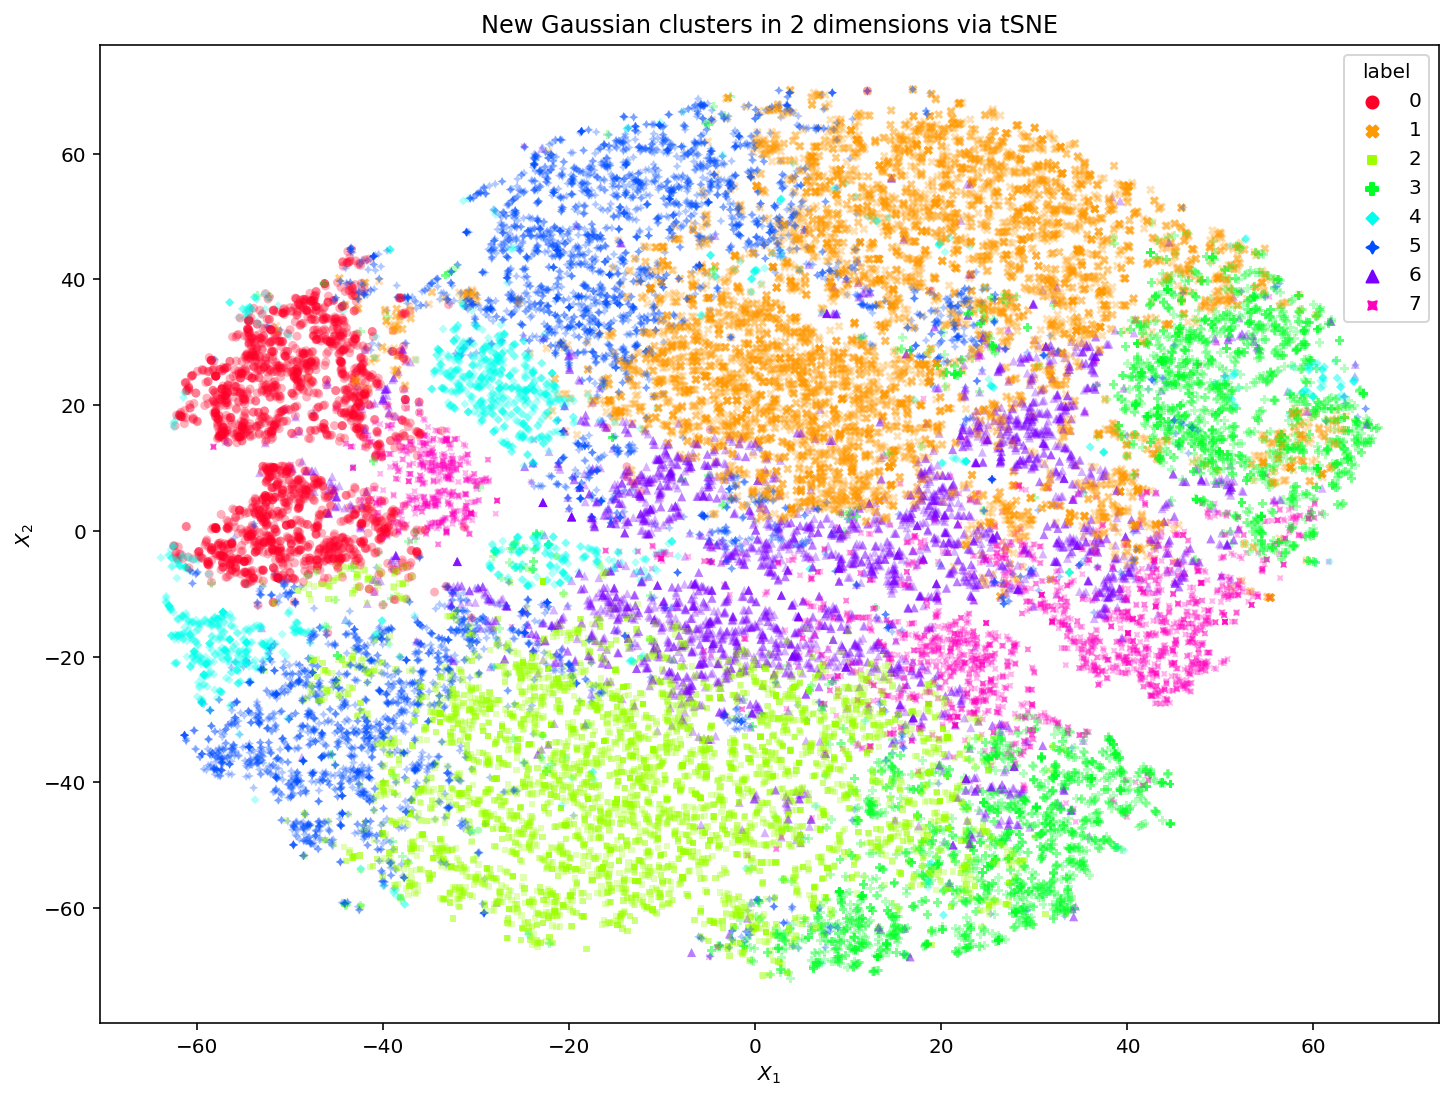

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.scatterplot(
    x=X_tsne_gm[:,0],
    y=X_tsne_gm[:,1],
    style=gaussian_Y,
    hue=gaussian_Y,
    edgecolor="white",
    palette="gist_rainbow",
    linewidth=0.01,
    s=20,
    legend=list(gaussian_Y.unique()),
    alpha=0.3
).set_title("New Gaussian clusters in 2 dimensions via tSNE")
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()